In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [10]:
df = pd.read_excel('./deep_data/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [14]:
df.columns = [1,2,3,4,5,6,7,8,9]

In [15]:
df

,1,2,3,4,5,6,7,8,9
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [16]:
y = df[9]
x = df.drop(9, axis=1)

In [17]:
y.shape

(1030,)

In [18]:
x.shape

(1030, 8)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [37]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='mse', metrics=['mse'], optimizer='adam')

In [39]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, batch_size=20)

Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 1394.2391 - mse: 1394.2391 - val_loss: 1157.3243 - val_mse: 1157.3243
Epoch 2/200
33/33 [==============================] - 0s 6ms/step - loss: 646.6835 - mse: 646.6835 - val_loss: 256.9948 - val_mse: 256.9948
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 224.6846 - mse: 224.6846 - val_loss: 210.7893 - val_mse: 210.7893
Epoch 4/200
33/33 [==============================] - 0s 6ms/step - loss: 191.2189 - mse: 191.2189 - val_loss: 192.0181 - val_mse: 192.0181
Epoch 5/200
33/33 [==============================] - 0s 6ms/step - loss: 178.1535 - mse: 178.1535 - val_loss: 183.2034 - val_mse: 183.2034
Epoch 6/200
33/33 [==============================] - 0s 5ms/step - loss: 167.7593 - mse: 167.7593 - val_loss: 166.9008 - val_mse: 166.9008
Epoch 7/200
33/33 [==============================] - 0s 5ms/step - loss: 158.2587 - mse: 158.2587 - val_loss: 162.2439 - val_mse: 162.2439
Epoch 8/200
33/33 [====

Epoch 61/200
33/33 [==============================] - 0s 5ms/step - loss: 20.8108 - mse: 20.8108 - val_loss: 29.9700 - val_mse: 29.9700
Epoch 62/200
33/33 [==============================] - 0s 4ms/step - loss: 20.2214 - mse: 20.2214 - val_loss: 34.5796 - val_mse: 34.5796
Epoch 63/200
33/33 [==============================] - 0s 4ms/step - loss: 21.0882 - mse: 21.0882 - val_loss: 28.9514 - val_mse: 28.9514
Epoch 64/200
33/33 [==============================] - 0s 4ms/step - loss: 19.1390 - mse: 19.1390 - val_loss: 29.4702 - val_mse: 29.4702
Epoch 65/200
33/33 [==============================] - 0s 4ms/step - loss: 19.1027 - mse: 19.1027 - val_loss: 31.1523 - val_mse: 31.1523
Epoch 66/200
33/33 [==============================] - 0s 4ms/step - loss: 19.1934 - mse: 19.1934 - val_loss: 28.3214 - val_mse: 28.3214
Epoch 67/200
33/33 [==============================] - 0s 4ms/step - loss: 20.5434 - mse: 20.5434 - val_loss: 29.4714 - val_mse: 29.4714
Epoch 68/200
33/33 [============================

33/33 [==============================] - 0s 4ms/step - loss: 11.8964 - mse: 11.8964 - val_loss: 26.9070 - val_mse: 26.9070
Epoch 122/200
33/33 [==============================] - 0s 4ms/step - loss: 12.2055 - mse: 12.2055 - val_loss: 24.2957 - val_mse: 24.2957
Epoch 123/200
33/33 [==============================] - 0s 5ms/step - loss: 11.8918 - mse: 11.8918 - val_loss: 25.0597 - val_mse: 25.0597
Epoch 124/200
33/33 [==============================] - 0s 4ms/step - loss: 12.6658 - mse: 12.6658 - val_loss: 26.9180 - val_mse: 26.9180
Epoch 125/200
33/33 [==============================] - 0s 4ms/step - loss: 11.1864 - mse: 11.1864 - val_loss: 22.3553 - val_mse: 22.3553
Epoch 126/200
33/33 [==============================] - 0s 4ms/step - loss: 11.5904 - mse: 11.5904 - val_loss: 22.4307 - val_mse: 22.4307
Epoch 127/200
33/33 [==============================] - 0s 4ms/step - loss: 11.5203 - mse: 11.5203 - val_loss: 23.0650 - val_mse: 23.0650
Epoch 128/200
33/33 [==============================] - 

33/33 [==============================] - 0s 4ms/step - loss: 8.7230 - mse: 8.7230 - val_loss: 25.4478 - val_mse: 25.4478
Epoch 182/200
33/33 [==============================] - 0s 4ms/step - loss: 8.2069 - mse: 8.2069 - val_loss: 22.6716 - val_mse: 22.6716
Epoch 183/200
33/33 [==============================] - 0s 4ms/step - loss: 8.1262 - mse: 8.1262 - val_loss: 22.5261 - val_mse: 22.5261
Epoch 184/200
33/33 [==============================] - 0s 4ms/step - loss: 8.3459 - mse: 8.3459 - val_loss: 21.9457 - val_mse: 21.9457
Epoch 185/200
33/33 [==============================] - 0s 4ms/step - loss: 9.2552 - mse: 9.2552 - val_loss: 25.4342 - val_mse: 25.4342
Epoch 186/200
33/33 [==============================] - 0s 5ms/step - loss: 9.2550 - mse: 9.2550 - val_loss: 21.4622 - val_mse: 21.4622
Epoch 187/200
33/33 [==============================] - 0s 4ms/step - loss: 8.2767 - mse: 8.2767 - val_loss: 20.6002 - val_mse: 20.6002
Epoch 188/200
33/33 [==============================] - 0s 4ms/step - 

In [44]:
pred = model.predict(x_test_sc)

In [43]:
y_test

60     54.378283
834    33.687797
605     6.467285
974    15.526310
211    24.483293
         ...    
157    77.297154
437    38.203865
714     8.374375
317    44.140254
939    32.720463
Name: 9, Length: 206, dtype: float64

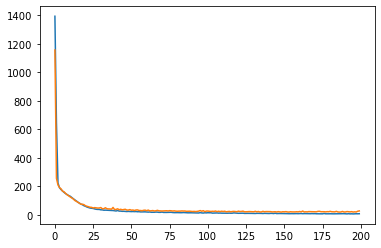

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
r2

0.8718109894405328